<a href="https://colab.research.google.com/github/ChaiwonLee/dbdtdatainsighters/blob/main/%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%84%B0%EC%A6%88_%ED%99%A9%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⬛ 문제 상황 (Problem Statement + Target Customer)

> 은행 고객들의 이탈

⬛ 분석 목표 (Jobs-to-be-done)

> 요인별로 분석 및 가입기간과의 관계를 탐색 해보고, 어떤 요인이 은행 이탈에 영향을 주는지 확인하고, 장기적으로 은행 고객 이탈로 인한 비용을 감소할 수 있도록 기여합니다.

⬛ 사용하는 데이터 출처 (Data Source)

> https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

⬛ 검증할 가설 (Hypothesis + Metrics)

> 가설 #1
* 귀무 가설(H0): 이탈한 자와 유지한 자 사이의 신용점수의 차이는 없다.
* 대립 가설(H1): 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.

> 가설 #2
* 귀무 가설(H0): 보유한 금융상품 수에 따른 신용점수에 차이가 없다.
* 대립 가설(H1): 보유한 금융상품 수에 따른 신용점수에 차이가 없다.

> 가설 #3
* 귀무 가설(H0): 잔고에 따른 신용점수에 차이가 없다.
* 대립 가설(H1): 잔고에 따른 신용점수에 차이가 있다.

> 가설 #4
* 귀무 가설(H0): 성별에 따른 신용점수에 차이가 없다.
* 대립 가설(H1): 성별에 따른 신용점수에 차이가 있다.

> 가설#5
* 귀무 가설(H0): 성별에 따른 이탈율 차이가 없다.
* 대립 가설(H1): 성별에 따른 이탈율 차이가 있다.














⬛ 탐색적 데이터 분석 (EDA + Observation)

(1) 라이브러리 불러오기

In [224]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats


(2) 데이터셋 불러오기

(3) 데이터 이름 지정

In [225]:
churn = pd.read_csv('/content/Churn_Modelling.csv')

(4) 데이터 훑어보기

In [226]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [227]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [228]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [229]:
# 각 변수의 고유한 값
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [230]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [231]:
churn.iloc[:,3:]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


⬛ 데이터 전처리 (Data Preprocessing)

In [232]:
# 사용하지 않는 컬럼 제거
churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)
churn_1 = churn
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [233]:
# 범주형(Object)으로 타입 변경
churn[['HasCrCard','IsActiveMember','Exited']]= churn[['HasCrCard','IsActiveMember','Exited']].astype('object')
churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [234]:
# numeric한 데이터만
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


0    79.63
1    20.37
Name: Exited, dtype: float64


<Axes: xlabel='Exited', ylabel='count'>

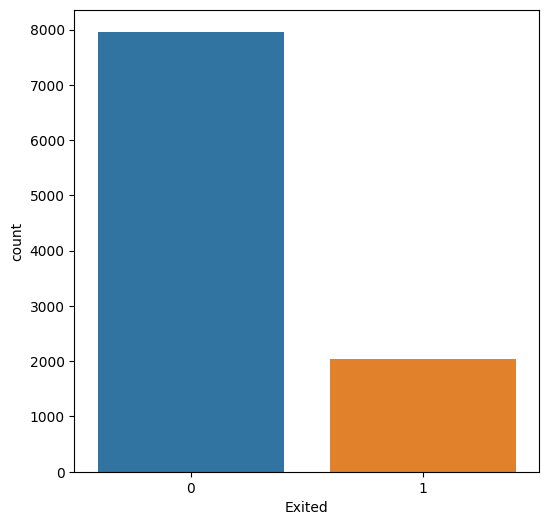

In [235]:
# 이탈한 사람의 전반적인 비율
print(churn['Exited'].value_counts(normalize=True)*100)

sns.countplot(x='Exited', data=churn)

<Axes: xlabel='CreditScoreGroup', ylabel='count'>

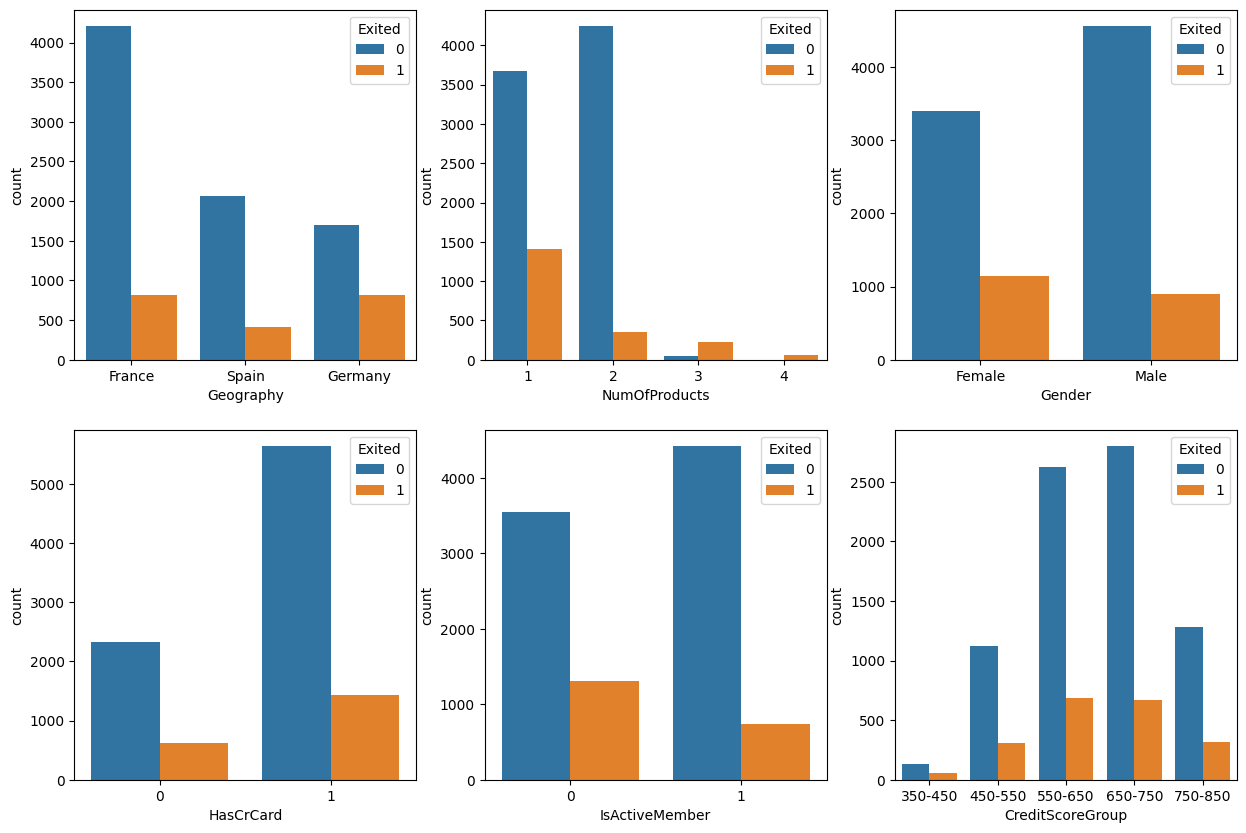

In [236]:
# fig는 전체 그림을 나타내고, axes는 그림 내의 하위 그래프들을 나타냅니다. 2행 3열의 그래프 레이아웃을 만듭니다
fig, axes = plt.subplots(2,3, figsize=(15, 10))

# 'Geography'열을 x축으로, 'Exited(이탈여부)'열을 hue(색상)로 사용
sns.countplot(x='Geography', hue = 'Exited',data = churn, ax=axes[0][0])
sns.countplot(x='NumOfProducts',hue='Exited', data=churn,  ax=axes[0][1])
sns.countplot(x='Gender', hue = 'Exited',data = churn, ax=axes[0][2])
sns.countplot(x='HasCrCard', hue = 'Exited',data = churn, ax=axes[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = churn, ax=axes[1][1])

# 나이를 10세 간격으로 그룹화합니다. (예: 20-29, 30-39, 등)
#churn['AgeGroup'] = pd.cut(churn['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-29', '30-39', '40-49', '50-59', '60+'])
# 수정된 코드로 막대 그래프를 그립니다.
#sns.countplot(x='AgeGroup', hue='Exited', data=churn, ax=axes[1][2])

# CreditScore
churn['CreditScoreGroup'] = pd.cut(churn['CreditScore'], bins=[350, 450, 550, 650, 750, 850], labels=['350-450', '450-550', '550-650', '650-750', '750-850'])
# 수정된 코드로 막대 그래프를 그립니다.
sns.countplot(x='CreditScoreGroup', hue='Exited', data=churn, ax=axes[1][2])

⬛ 분석

In [237]:
# 가설 1
# • 귀무 가설(H0): 이탈한 자와 유지한 자 사이의 신용점수의 차이는 없다.
# • 대립 가설(H1): 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

exited_group = churn[churn['Exited'] == 1]
not_exited_group = churn[churn['Exited'] == 0]

credit_scores_exited_O = exited_group['CreditScore']
credit_scores_exited_X = not_exited_group['CreditScore']
t_statistic_1, p_value_1 = stats.ttest_ind(credit_scores_exited_O, credit_scores_exited_X)

# 결과 출력
print(p_value_1)
if p_value_1 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 이탈한 자와 유지한 자 사이의 신용점수의 차이는 없다.")

0.006738213892192373
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.


In [238]:
# 가설 2
# • 귀무 가설(H0): 보유한 금융상품 수에 따른 신용점수에 차이가 없다.
# • 대립 가설(H1): 보유한 금융상품 수에 따른 신용점수에 차이가 있다.

# 분산분석 (ANOVA, Analysis of Variance)

# 각 그룹의 데이터 준비
group_1_product = churn[churn['NumOfProducts'] == 1]['CreditScore']
group_2_product = churn[churn['NumOfProducts'] == 2]['CreditScore']
group_3_product = churn[churn['NumOfProducts'] == 3]['CreditScore']
group_4_product = churn[churn['NumOfProducts'] == 4]['CreditScore']

# ANOVA 수행
f_statistic_2, p_value_2 = stats.f_oneway(group_1_product, group_2_product, group_3_product, group_4_product)

# 결과 출력
print(f"t-statistic: {f_statistic_2}, p-value: {p_value_2}")

if p_value_2 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 보유한 금융상품 수에 따른 신용점수에 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 보유한 금융상품 수에 따른 신용점수에 차이가 없다.")

t-statistic: 0.8864761142070923, p-value: 0.4472040985916901
귀무가설(H0)을 기각하지 않습니다. -> 보유한 금융상품 수에 따른 신용점수에 차이가 없다.


In [239]:
# 가설 3
# • 귀무 가설(H0): 잔고에 따른 신용점수에 차이가 없다.
# • 대립 가설(H1): 잔고에 따른 신용점수에 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

# 평균(mean) 계산
balace_mean_value = np.mean(churn['Balance'])
# 중앙값(median) 계산
balace_median_value = np.median(churn['Balance'])

# 두 그룹의 데이터 준비 (예: 잔고가 낮은 그룹과 잔고가 높은 그룹)
group_low_balance = churn[churn['Balance'] <= balace_mean_value]['CreditScore']
group_high_balance = churn[churn['Balance'] > balace_mean_value]['CreditScore']

# 독립표본 t-검정 수행
t_statistic_3, p_value_3 = stats.ttest_ind(group_low_balance, group_high_balance)

# 결과 출력
print(f"t-statistic: {t_statistic_3}, p-value: {p_value_3}")

if p_value_3 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 잔고에 따른 신용점수에 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 잔고에 따른 신용점수에 차이가 없다.")

t-statistic: -0.8323566395733117, p-value: 0.4052275499353919
귀무가설(H0)을 기각하지 않습니다. -> 잔고에 따른 신용점수에 차이가 없다.


In [240]:
# 가설 4
# • 귀무 가설(H0): 성별에 따른 신용점수에 차이가 없다.
# • 대립 가설(H1): 성별에 따른 신용점수에 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

# 남성과 여성 그룹의 데이터 준비
group_male = churn[churn['Gender'] == 'Male']['CreditScore']
group_female = churn[churn['Gender'] == 'Female']['CreditScore']

# 독립표본 t-검정 수행
t_statistic_4, p_value_4 = stats.ttest_ind(group_male, group_female)

# 결과 출력
print(f"t-statistic: {t_statistic_4}, p-value: {p_value_4}")

if p_value_4 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 성별에 따른 신용점수에 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 성별에 따른 신용점수에 차이가 없다.")

t-statistic: -0.2856346098463999, p-value: 0.7751639097068665
귀무가설(H0)을 기각하지 않습니다. -> 성별에 따른 신용점수에 차이가 없다.


In [241]:
# 가설 5
# • 귀무 가설(H0): 성별에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 성별에 따른 이탈율 차이가 있다.

# 카이제곱 검정 (Chi-square test)

# 교차표 생성
gender_contingency_table = pd.crosstab(churn['Gender'], churn['Exited'])

# 카이제곱 검정 수행
chi2_stat_gender, p_value_5, _, _ = stats.chi2_contingency(gender_contingency_table)


# 결과 출력
print(f"Chi-squared statistic: {chi2_stat_gender}, p-value: {p_value_5}")

if p_value_5 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 성별에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 성별에 따른 이탈율 차이가 없다.")

Chi-squared statistic: 112.91857062096116, p-value: 2.2482100097131755e-26
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 성별에 따른 이탈율 차이가 있다.


In [242]:
# 가설 6
# • 귀무 가설(H0): 지역에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 지역에 따른 이탈율 차이가 있다.

# 카이제곱 검정 (Chi-square test)

# 교차표 생성
geo_contingency_table = pd.crosstab(churn['Geography'], churn['Exited'])

# 카이제곱 검정 수행
chi2_stat_geo, p_value_6, _, _ = stats.chi2_contingency(geo_contingency_table)


# 결과 출력
print(f"Chi-squared statistic: {chi2_stat_geo}, p-value: {p_value_6}")

if p_value_6 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 지역에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 지역에 따른 이탈율 차이가 없다.")

Chi-squared statistic: 301.25533682434536, p-value: 3.8303176053541544e-66
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 지역에 따른 이탈율 차이가 있다.


In [243]:
# 가설 7
# • 귀무 가설(H0): 추정 연봉에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 추정 연봉에 따른 이탈율 차이가 있다.

# 이항검정 (Binomial Test)
from statsmodels.stats.proportion import proportions_ztest

# 평균(mean) 계산
salary_mean_value = np.mean(churn['EstimatedSalary'])
# 중앙값(median) 계산
salary_median_value = np.median(churn['EstimatedSalary'])

# 추정 연봉이 80000 미만인 그룹과 이상인 그룹 간의 이항검정 수행
group_low_salary = churn[churn['EstimatedSalary'] <= salary_mean_value]['Exited']
group_high_salary = churn[churn['EstimatedSalary'] > salary_mean_value]['Exited']

count_low_salary = group_low_salary.sum()  # 이탈한 경우의 수
nobs_low_salary = len(group_low_salary)     # 전체 샘플 수

count_high_salary = group_high_salary.sum()  # 이탈한 경우의 수
nobs_high_salary = len(group_high_salary)     # 전체 샘플 수

# 이항검정 수행
z_stat_salary, p_value_7 = proportions_ztest([count_low_salary, count_high_salary], [nobs_low_salary, nobs_high_salary])

# 결과 출력
print(f"Z-statistic: {z_stat_salary}, p-value: {p_value_7}")

if p_value_7 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 추정 연봉에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 추정 연봉에 따른 이탈율 차이가 없다.")

Z-statistic: -1.0961741455881737, p-value: 0.2730025717756891
귀무가설(H0)을 기각하지 않습니다. -> 추정 연봉에 따른 이탈율 차이가 없다.


In [244]:
# 가설 8
# • 귀무 가설(H0): 신용카드 소지 여부에 따른 신용점수 차이가 없다.
# • 대립 가설(H1): 신용카드 소지 여부에 따른 신용점수 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

# 두 그룹 간의 독립표본 t-검정 수행
group_has_card = churn[churn['HasCrCard'] == 1]['CreditScore']
group_no_card = churn[churn['HasCrCard'] == 0]['CreditScore']

t_statistic_8, p_value_8 = stats.ttest_ind(group_has_card, group_no_card)

# 결과 출력
print(f"t-statistic: {t_statistic_8}, p-value: {p_value_8}")

if p_value_8 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 신용카드 소지 여부에 따른 신용점수 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 신용카드 소지 여부에 따른 신용점수 차이가 없다.")

t-statistic: -0.5458017530613642, p-value: 0.5852143953187045
귀무가설(H0)을 기각하지 않습니다. -> 신용카드 소지 여부에 따른 신용점수 차이가 없다.


In [245]:
# 가설 9
# • 귀무 가설(H0): 나이에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 나이에 따른 이탈율 차이가 있다.

# ANOVA (Analysis of Variance)

# 나이에 따른 그룹 간의 ANOVA 수행
group_ages = [churn[churn['Age'] == age]['Exited'] for age in churn['Age']]
f_statistic_age, p_value_9 = stats.f_oneway(*group_ages)

# 결과 출력
print(f"t-statistic: {f_statistic_age}, p-value: {p_value_9}")

if p_value_9 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 나이에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 나이에 따른 이탈율 차이가 없다.")

t-statistic: 33.0818888687036, p-value: 0.0
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 나이에 따른 이탈율 차이가 있다.


**가설 결과**
- 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.
- 성별에 따른 이탈율 차이가 있다.
- 지역에 따른 이탈율 차이가 있다.
- 나이에 따른 이탈율 차이가 있다.

<Axes: xlabel='CreditScoreGroup', ylabel='count'>

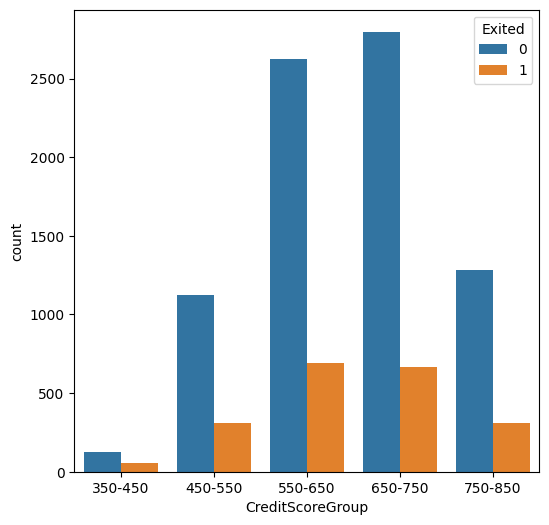

In [246]:
# 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.

churn['CreditScoreGroup'] = pd.cut(churn['CreditScore'], bins=[350, 450, 550, 650, 750, 850], labels=['350-450', '450-550', '550-650', '650-750', '750-850'])

sns.countplot(x='CreditScoreGroup', data=churn, hue='Exited')

신용점수가 550~750점대인 고객들의 이탈율이 높은 것으로 보입니다.

Text(0, 0.5, 'Churn Percentage')

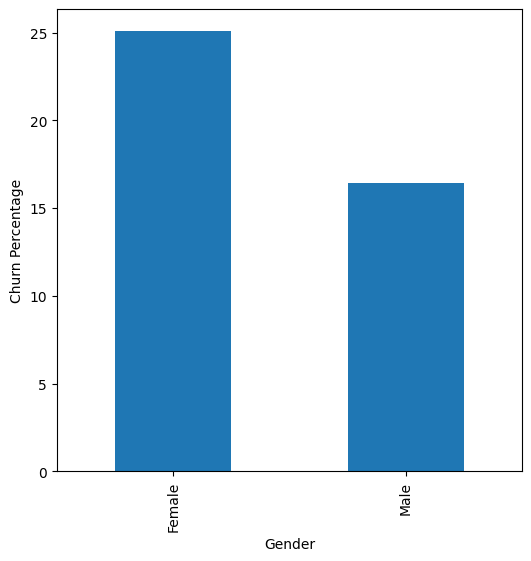

In [247]:
# 성별에 따른 이탈율 차이가 있다.

plt.rcParams['figure.figsize'] = (6,6)
(churn.groupby('Gender')['Exited'].mean()*100).plot(kind='bar')
plt.ylabel('Churn Percentage')

전반적으로 여성의 이탈율이 높은 것으로 보입니다.

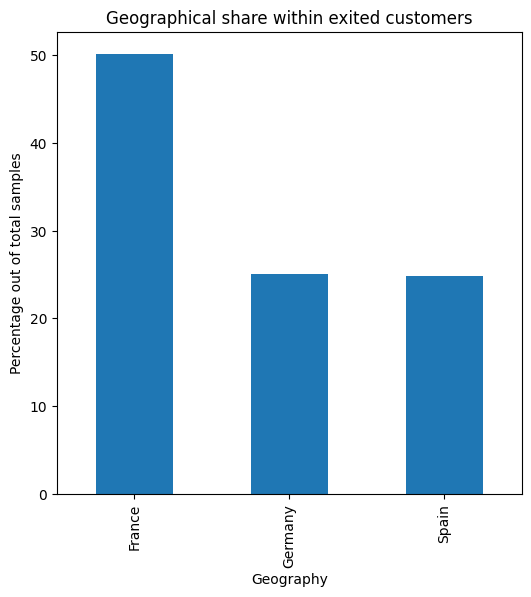

In [248]:
# 지역에 따른 이탈율 차이가 있다.

plt.figure(figsize = (6,6))
(churn['Geography'].value_counts()/churn['Geography'].value_counts().sum()*100).plot(kind='bar')
plt.ylabel('Percentage out of total samples')
plt.xlabel('Geography')
plt.title('Geographical share within exited customers');

고객 중 약 50%는 프랑스 출신입니다. 독일과 스페인은 거의 동일한 25%의 점유율을 가지고 있습니다.

Text(0.5, 1.0, 'Churn by geography')

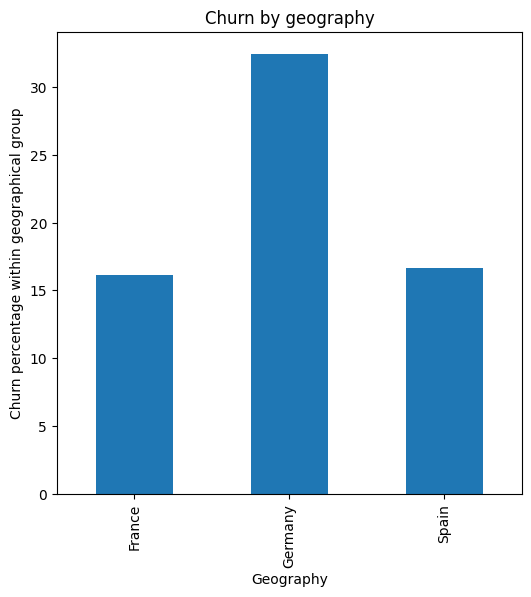

In [249]:
ct = pd.crosstab(churn['Exited'], churn['Geography'])
ct

plt.figure(figsize=(6,6))
(ct.loc[1] * 100.0 / ct.sum()).plot(x=ct.index, y=ct.values, kind='bar')
plt.ylabel('Churn percentage within geographical group')
plt.title('Churn by geography')

독일 고객은 가장 높은 이탈 비율을 보입니다. 프랑스와 스페인 고객의 경우 이탈 비율이 거의 동일한 것으로 보입니다.

<Axes: xlabel='Exited', ylabel='Age'>

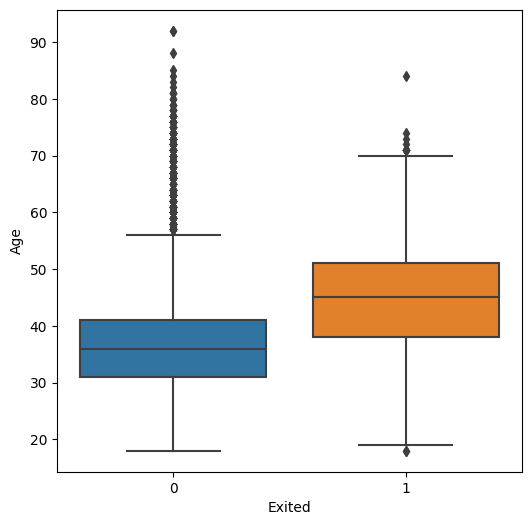

In [250]:
# 나이에 따른 이탈율 차이가 있다.

plt.figure(figsize=(6,6))
sns.boxplot(x='Exited', y='Age', data=churn)

40-50세 연령대의 고객이 가장 이탈할 가능성이 높습니다. 30-40세 연령대의 젊은 고객들은 유지될 가능성이 더 높습니다.



⬛ 분석 결과 요약 (Key Result + Summarization)

- 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.
- 성별에 따른 이탈율 차이가 있다.
- 지역에 따른 이탈율 차이가 있다.
- 나이에 따른 이탈율 차이가 있다.

1. 신용점수가 550~750점대인 고객들의 이탈율이 높은 것으로 보입니다.
2. 전반적으로 여성의 이탈율이 높은 것으로 보입니다.
3. 고객 중 약 50%는 프랑스 출신입니다. 독일과 스페인은 거의 동일한 25%의 점유율을 가지고 있습니다. 독일 고객은 가장 높은 이탈 비율을 보입니다. 프랑스와 스페인 고객의 경우 이탈 비율이 거의 동일한 것으로 보입니다.
4. 40-50세 연령대의 고객이 가장 이탈할 가능성이 높습니다. 30-40세 연령대의 젊은 고객들은 유지될 가능성이 더 높습니다.



⬛ 배운 내용(Today I learned)

⬛ 보완할 점 (Benchmarks + Trade-offs and Tension)